In [20]:
def processing_scaling(X):
    Y =X["Survived"]
    X = X.drop(["Name","Survived"],axis =1)
    X["Sex"]=(X["Sex"].replace("female",1)).replace("male",0)
    X = (X - X.mean())/X.std()
    return X,Y
    

In [21]:
#gradient descent and logistic regression
def gd(X,y,epochs):
    
    X = np.insert(X.values,0,1,axis=1)#adding b as column of 1's to the w matrix
    weights = np.ones(X.shape[1])
    lr = 0.5
    loss_function= []
    
    for i in range(epochs):
        y_hat = sigmoid(np.dot(X,weights))
        loss = (-y*(np.log(y_hat)) - (1 - y)*(np.log(1-y_hat))).mean() 
        loss_function.append(loss)
        weights = weights + lr*np.dot((y-y_hat),X)/X.shape[0]
        
    return weights[1:],weights[0],loss_function


In [22]:
#defining sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [25]:
def accuracy(X,Y,w,b):
    Z = np.dot(X,w) + b
    prediction = sigmoid(Z)

    for i in range(test.shape[0]):
        if prediction[i] >= 0.5:
            prediction[i] = 1
        else:
            prediction[i] = 0

    correct_prediction = 0
    for i in range(Y_test.shape[0]): 
        if Y_test[i] == prediction[i]:
            correct_prediction += 1
    accuracy = correct_prediction*100/(Y_test.shape[0]) 
    return accuracy



Number of Iterations:100
the weights w are:- [-0.71206466  1.29376085 -0.47201427 -0.45539777 -0.03224178  0.07359563]
the weight b is :- -0.5540913623623747


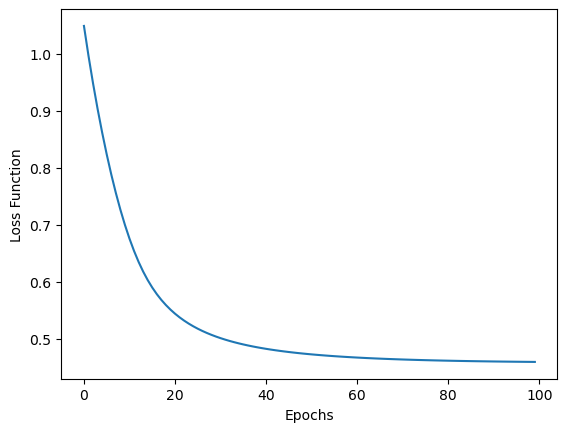

train accuracy : 54.193548387096776
test accuracy : 80.96774193548387


In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


train = pd.read_csv("trainlogisticregression.csv")
test = pd.read_csv("testlogisticregression.csv")
X_train,Y_train = processing_scaling(train)
X_test,Y_test = processing_scaling(test)
epochs = int(input("Number of Iterations:"))
w,b,costfunction = gd(X_train,Y_train,epochs)
print("the weights w are:-" , w)
print("the weight b is :-", b)

#plotting loss function vs epochs graph
plt.plot(range(epochs), costfunction)
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.show()


#checking accuracy of model with train and test data
train_accuracy = accuracy(X_train,Y_train,w,b)
test_accuracy = accuracy(X_test,Y_test,w,b)

print(f"train accuracy : {train_accuracy}")
print(f"test accuracy : {test_accuracy}")